In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from utils.load_dataset import load_eval_columns
from dataset_config import HopperConfig, MimicConfig, TudConfig

sns.set(style="darkgrid")
sns.set_context("talk")

In [2]:
hopper_config = HopperConfig()
tud_config = TudConfig()
mimic_config = MimicConfig()

In [5]:
tud_full_data = pd.read_csv("dataset/tud_state_vector_v3.csv", usecols=["BEa", "pHa"])
tud_2_full_data = pd.read_csv("dataset/tud_state_vector_v4.csv", usecols=["PaO2", "PaCO2"])

tud_miss_data = pd.read_csv("dataset/tud_3_w_missing_values_random.csv", usecols=["BEa", "pHa"])
tud_2_miss_data = pd.read_csv("dataset/tud_4_w_missing_values_random.csv", usecols=["PaO2", "PaCO2"])

tud_knn_13_data = pd.read_csv("Imputation_results/tud_3_imputed_knn_15.csv", usecols=["BEa", "pHa"])
tud_mice_data = pd.read_csv("Imputation_results/tud_3_imputed_mice.csv", usecols=["BEa", "pHa"])
tud_mf_data = pd.read_csv("Imputation_results/tud_3_imputed_miceforest.csv", usecols=["BEa", "pHa"])
tud_nn_data = pd.read_csv("Imputation_results/tud_3_imputed_nn.csv", usecols=["BEa", "pHa"])
tud_ssl_data = pd.read_csv("Imputation_results/tud_3_imputed_ssl.csv", usecols=["BEa", "pHa"])

tud_2_knn_13_data = pd.read_csv("Imputation_results/tud_4_imputed_knn_15.csv", usecols=["PaO2", "PaCO2"])
tud_2_mice_data = pd.read_csv("Imputation_results/tud_4_imputed_mice.csv", usecols=["PaO2", "PaCO2"])
tud_2_mf_data = pd.read_csv("Imputation_results/tud_4_imputed_miceforest.csv", usecols=["PaO2", "PaCO2"])
tud_2_nn_data = pd.read_csv("Imputation_results/tud_4_imputed_nn.csv", usecols=["PaO2", "PaCO2"])
tud_2_ssl_data = pd.read_csv("Imputation_results/tud_4_imputed_ssl.csv", usecols=["PaO2", "PaCO2"])


In [10]:
mimiciv_full_data = pd.read_csv("dataset\\mimiciv_full_data.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_2_full_data = pd.read_csv("dataset/mimiciv_state_vectors_v3.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])

mimiciv_miss_data = pd.read_csv("dataset/v1_datasets/mimiciv_w_missing_values_random.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_2_miss_data = pd.read_csv("dataset/mimiciv_3_w_missing_values_random.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])

mimiciv_knn_13_data = pd.read_csv("Imputation_results/mimiciv_imputed_knn_15.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_mice_data = pd.read_csv("Imputation_results/mimiciv_imputed_mice.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_mf_data = pd.read_csv("Imputation_results/mimiciv_imputed_miceforest.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_nn_data = pd.read_csv("Imputation_results/mimiciv_imputed_nn.csv", usecols=["blood_paco2", "blood_pao2"])
mimiciv_ssl_data = pd.read_csv("Imputation_results/mimiciv_imputed_ssl.csv", usecols=["blood_paco2", "blood_pao2"])

mimiciv_2_knn_13_data = pd.read_csv("Imputation_results/mimiciv_3_imputed_knn_15.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_mice_data = pd.read_csv("Imputation_results/mimiciv_3_imputed_mice.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_mf_data = pd.read_csv("Imputation_results/mimiciv_3_imputed_miceforest.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_nn_data = pd.read_csv("Imputation_results/mimiciv_3_imputed_nn.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])
mimiciv_2_ssl_data = pd.read_csv("Imputation_results/mimiciv_3_imputed_ssl.csv", usecols=["blood_be", "vital_map", "vent_pinsp"])

In [2]:
tud_eval_col_dict ={}
tud_2_eval_col_dict ={}
mimiciv_eval_col_dict ={}
mimiciv_2_eval_col_dict ={}
hop_eval_col_dict = {}

In [3]:
labels = ['original', 'knn_15', 'mice', 'miceforest', 'GRU', 'ssl']
colors = ['blue', 'red', 'green', 'purple', 'orange', 'magenta']

In [4]:
def new_scatter_plot(data: dict, col):
    fig_ns, axs_ns = plt.subplots(6, 1, figsize=(17, 25))
    
    sns.scatterplot(data=data[f"og_{col}"].reset_index(drop=True), ax=axs_ns[0], s=50, alpha=0.7, color=colors[0])  # Adjust parameters as needed
    sns.scatterplot(data=data[f"imputed_{col}_knn_13"].reset_index(drop=True), ax=axs_ns[1], s=50, alpha=0.7, color=colors[1])  # Adjust parameters as needed
    sns.scatterplot(data=data[f"imputed_{col}_mice"].reset_index(drop=True), ax=axs_ns[2], s=50, alpha=0.7, color=colors[2])  # Adjust parameters as needed
    sns.scatterplot(data=data[f"imputed_{col}_mf"].reset_index(drop=True), ax=axs_ns[3], s=50, alpha=0.7, color=colors[3])  # Adjust parameters as needed
    sns.scatterplot(data=data[f"imputed_{col}_nn"].reset_index(drop=True), ax=axs_ns[4], s=50, alpha=0.7, color=colors[4])  # Adjust parameters as needed
    sns.scatterplot(data=data[f"imputed_{col}_ssl"].reset_index(drop=True), ax=axs_ns[5], s=50, alpha=0.7, color=colors[5])  # Adjust parameters as needed

    for i, ax in enumerate(axs_ns):
        ax.set_ylabel(labels[i])

    axs_ns[0].set_title(f'Distribution of {col}', fontsize=16)
        
    plt.savefig(f"visualizations/scatter_plots/{col}_scatter_plot.png", bbox_inches='tight')
    plt.close()

def plot_hist(data: dict, col):
    fig_h, axs_h = plt.subplots(6, 1, figsize=(17, 25))

    bin_edges = np.histogram_bin_edges(data[f"og_{col}"].reset_index(drop=True), bins='auto')
    total_bins = len(bin_edges)-1
    #print(col, total_bins)

    sns.histplot(data=data[f"og_{col}"].reset_index(drop=True), bins=total_bins, ax=axs_h[0], kde=True, color=colors[0])  # Adjust parameters as needed
    sns.histplot(data=data[f"imputed_{col}_knn_13"].reset_index(drop=True), bins=total_bins, ax=axs_h[1], kde=True, color=colors[1])  # Adjust parameters as needed
    sns.histplot(data=data[f"imputed_{col}_mice"].reset_index(drop=True), bins=total_bins, ax=axs_h[2], kde=True, color=colors[2])  # Adjust parameters as needed
    sns.histplot(data=data[f"imputed_{col}_mf"].reset_index(drop=True), bins=total_bins, ax=axs_h[3], kde=True, color=colors[3])  # Adjust parameters as needed
    sns.histplot(data=data[f"imputed_{col}_nn"].reset_index(drop=True), bins=total_bins, ax=axs_h[4], kde=True, color=colors[4])  # Adjust parameters as needed
    sns.histplot(data=data[f"imputed_{col}_ssl"].reset_index(drop=True), bins=total_bins, ax=axs_h[5], kde=True, color=colors[5])  # Adjust parameters as needed

    # Add mean line
    axs_h[0].axvline(data[f"og_{col}"].mean(), color='k', linestyle='dashed', linewidth=3)
    axs_h[0].text(data[f"og_{col}"].mean()+0.5, axs_h[0].get_ylim()[1]*0.9, f'Mean: {data[f"og_{col}"].mean():.2f}', weight='bold', fontsize=18)

    axs_h[1].axvline(data[f"imputed_{col}_knn_13"].mean(), color='k', linestyle='dashed', linewidth=3)
    axs_h[1].text(data[f"imputed_{col}_knn_13"].mean()+0.5, axs_h[1].get_ylim()[1]*0.9, f'Mean: {data[f"imputed_{col}_knn_13"].mean():.2f}', weight='bold', fontsize=18)

    axs_h[2].axvline(data[f"imputed_{col}_mice"].mean(), color='k', linestyle='dashed', linewidth=3)
    axs_h[2].text(data[f"imputed_{col}_mice"].mean()+0.5, axs_h[2].get_ylim()[1]*0.9, f'Mean: {data[f"imputed_{col}_mice"].mean():.2f}', weight='bold', fontsize=18)

    axs_h[3].axvline(data[f"imputed_{col}_mf"].mean(), color='k', linestyle='dashed', linewidth=3)
    axs_h[3].text(data[f"imputed_{col}_mf"].mean()+0.5, axs_h[3].get_ylim()[1]*0.9, f'Mean: {data[f"imputed_{col}_mf"].mean():.2f}', weight='bold', fontsize=18)

    axs_h[4].axvline(data[f"imputed_{col}_nn"].mean(), color='k', linestyle='dashed', linewidth=3)
    axs_h[4].text(data[f"imputed_{col}_nn"].mean()+0.5, axs_h[4].get_ylim()[1]*0.9, f'Mean: {data[f"imputed_{col}_nn"].mean():.2f}', weight='bold', fontsize=18)

    axs_h[5].axvline(data[f"imputed_{col}_ssl"].mean(), color='k', linestyle='dashed', linewidth=3)
    axs_h[5].text(data[f"imputed_{col}_ssl"].mean()+0.5, axs_h[5].get_ylim()[1]*0.9, f'Mean: {data[f"imputed_{col}_ssl"].mean():.2f}', weight='bold', fontsize=18)

    for i, ax in enumerate(axs_h):
        ax.set_ylabel(labels[i])

    axs_h[0].set_title(f'Histogram of {col}', fontsize=16)
    plt.savefig(f"visualizations/histogram/{col}_histogram.png", bbox_inches='tight')
    plt.close()
    
    


In [7]:
hop_full_data = pd.read_csv("dataset/Hopper-v4.csv", usecols=["obs_6", "obs_7"])
hop_miss_data = pd.read_csv("dataset/Hopper-v4_w_missing_values_random.csv", usecols=["obs_6", "obs_7"])

hop_knn_13_data = pd.read_csv("Imputation_results/Old/Hopper-v4_w_imputed_knn_random_13.csv", usecols=["obs_6", "obs_7"])
hop_mice_data = pd.read_csv("Imputation_results/old/Hopper-v4_w_imputed_mice_random.csv", usecols=["obs_6", "obs_7"])
hop_mf_data = pd.read_csv("Imputation_results/old/Hopper-v4_w_imputed_mf_random.csv", usecols=["obs_6", "obs_7"])
hop_nn_data = pd.read_csv("Imputation_results/old/hopper_imputed_nn.csv", usecols=["obs_6", "obs_7"])
hop_ssl_data = pd.read_csv("Imputation_results/Old/hopper_imputed_ssl.csv", usecols=["obs_6", "obs_7"])

for col in ["obs_6", "obs_7"]:
    hop_miss_col_row = hop_miss_data.loc[:, col].isna()

    hop_og_col = hop_full_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_knn_13 = hop_knn_13_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_mice = hop_mice_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_mf = hop_mf_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_nn = hop_nn_data[hop_miss_col_row].loc[:, col]
    hop_imputed_col_ssl = hop_ssl_data[hop_miss_col_row].loc[:, col]
    
    hop_eval_col_dict[f"og_{col}"] = hop_og_col
    hop_eval_col_dict[f"imputed_{col}_knn_13"] = hop_imputed_col_knn_13
    hop_eval_col_dict[f"imputed_{col}_mice"] = hop_imputed_col_mice
    hop_eval_col_dict[f"imputed_{col}_mf"] = hop_imputed_col_mf
    hop_eval_col_dict[f"imputed_{col}_nn"] = hop_imputed_col_nn
    hop_eval_col_dict[f"imputed_{col}_ssl"] = hop_imputed_col_ssl
    #new_scatter_plot(tud_eval_col_dict, col)
    plot_hist(hop_eval_col_dict, col)

# TUD Plotting

In [12]:
for col in ["BEa", "pHa"]:
    tud_miss_col_row = tud_miss_data.loc[:, col].isna()

    tud_og_col = tud_full_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_knn_13 = tud_knn_13_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_mice = tud_mice_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_mf = tud_mf_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_nn = tud_nn_data[tud_miss_col_row].loc[:, col]
    tud_imputed_col_ssl = tud_ssl_data[tud_miss_col_row].loc[:, col]

    tud_eval_col_dict[f"og_{col}"] = tud_og_col
    tud_eval_col_dict[f"imputed_{col}_knn_13"] = tud_imputed_col_knn_13
    tud_eval_col_dict[f"imputed_{col}_mice"] = tud_imputed_col_mice
    tud_eval_col_dict[f"imputed_{col}_mf"] = tud_imputed_col_mf
    tud_eval_col_dict[f"imputed_{col}_nn"] = tud_imputed_col_nn
    tud_eval_col_dict[f"imputed_{col}_ssl"] = tud_imputed_col_ssl
    #new_scatter_plot(tud_eval_col_dict, col)
    plot_hist(tud_eval_col_dict, col)

for col in ["PaO2", "PaCO2"]:
    tud_2_miss_col_row = tud_2_miss_data.loc[:, col].isna()

    tud_2_og_col = tud_2_full_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_knn_13 = tud_2_knn_13_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_mice = tud_2_mice_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_mf = tud_2_mf_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_nn = tud_2_nn_data[tud_2_miss_col_row].loc[:, col]
    tud_2_imputed_col_ssl = tud_2_ssl_data[tud_2_miss_col_row].loc[:, col]

    tud_2_eval_col_dict[f"og_{col}"] = tud_2_og_col
    tud_2_eval_col_dict[f"imputed_{col}_knn_13"] = tud_2_imputed_col_knn_13
    tud_2_eval_col_dict[f"imputed_{col}_mice"] = tud_2_imputed_col_mice
    tud_2_eval_col_dict[f"imputed_{col}_mf"] = tud_2_imputed_col_mf
    tud_2_eval_col_dict[f"imputed_{col}_nn"] = tud_2_imputed_col_nn
    tud_2_eval_col_dict[f"imputed_{col}_ssl"] = tud_2_imputed_col_ssl
    #new_scatter_plot(tud_2_eval_col_dict, col)
    plot_hist(tud_2_eval_col_dict, col)

# MIMIC IV Plotting

In [13]:
for col in ["blood_paco2", "blood_pao2"]:
    mimiciv_miss_col_row = mimiciv_miss_data.loc[:, col].isna()

    mimiciv_og_col = mimiciv_full_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_knn_13 = mimiciv_knn_13_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_mice = mimiciv_mice_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_mf = mimiciv_mf_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_nn = mimiciv_nn_data[mimiciv_miss_col_row].loc[:, col]
    mimiciv_imputed_col_ssl = mimiciv_ssl_data[mimiciv_miss_col_row].loc[:, col]

    mimiciv_eval_col_dict[f"og_{col}"] = mimiciv_og_col
    mimiciv_eval_col_dict[f"imputed_{col}_knn_13"] = mimiciv_imputed_col_knn_13
    mimiciv_eval_col_dict[f"imputed_{col}_mice"] = mimiciv_imputed_col_mice
    mimiciv_eval_col_dict[f"imputed_{col}_mf"] = mimiciv_imputed_col_mf
    mimiciv_eval_col_dict[f"imputed_{col}_nn"] = mimiciv_imputed_col_nn
    mimiciv_eval_col_dict[f"imputed_{col}_ssl"] = mimiciv_imputed_col_ssl
    #new_scatter_plot(mimiciv_eval_col_dict, col)
    plot_hist(mimiciv_eval_col_dict, col)

for col in ["blood_be", "vital_map", "vent_pinsp"]:
    mimiciv_2_miss_col_row = mimiciv_2_miss_data.loc[:, col].isna()

    mimiciv_2_og_col = mimiciv_2_full_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_knn_13 = mimiciv_2_knn_13_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_mice = mimiciv_2_mice_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_mf = mimiciv_2_mf_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_nn = mimiciv_2_nn_data[mimiciv_2_miss_col_row].loc[:, col]
    mimiciv_2_imputed_col_ssl = mimiciv_2_ssl_data[mimiciv_2_miss_col_row].loc[:, col]

    mimiciv_2_eval_col_dict[f"og_{col}"] = mimiciv_2_og_col
    mimiciv_2_eval_col_dict[f"imputed_{col}_knn_13"] = mimiciv_2_imputed_col_knn_13
    mimiciv_2_eval_col_dict[f"imputed_{col}_mice"] = mimiciv_2_imputed_col_mice
    mimiciv_2_eval_col_dict[f"imputed_{col}_mf"] = mimiciv_2_imputed_col_mf
    mimiciv_2_eval_col_dict[f"imputed_{col}_nn"] = mimiciv_2_imputed_col_nn
    mimiciv_2_eval_col_dict[f"imputed_{col}_ssl"] = mimiciv_2_imputed_col_ssl
    #new_scatter_plot(mimiciv_2_eval_col_dict, col)
    plot_hist(mimiciv_2_eval_col_dict, col)

In [2]:
imputers = ["knn_13", "mice", "mf", "nn", "ssl"]

In [2]:


def plot_bar(data_cfg, mean_df: pd.DataFrame):

    for col in data_cfg.missing_state_vector:
        filter_col  = [item for item in mean_df.columns if item.startswith(col)]
        filter_df = mean_df[filter_col]
        filter_df.columns = [item.replace(f'{col}_', '') for item in filter_df.columns]
        ax = plt.subplot()
        sns.barplot(x=filter_df.columns, y=filter_df.values[0], ax=ax)
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points', fontsize=12)
        plt.xlabel("Imputers", fontsize=12)
        plt.xticks(rotation=90)
        plt.title(f"Mean Values {col}")
        plt.tight_layout() 
        plt.savefig(f"visualizations/mean_plots/{col}_mean_values.png", bbox_inches='tight')
        plt.close()

def corr_mat(path: str, cols: list, miss_cols: list, dataset_name: str):

    data = pd.read_csv(path, usecols=cols)
    # Calculate the correlation matrix
    correlation_matrix = data.corr()
    correlation_matrix = correlation_matrix.loc[miss_cols, :]
    correlation_matrix = correlation_matrix.drop(miss_cols, axis=1)
    num_vars = len(correlation_matrix.columns)
    fig_size = max(10, num_vars)

    plt.figure(figsize=(correlation_matrix.shape[1], correlation_matrix.shape[0]))

    # Plot the correlation matrix as a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 15})
    plt.title('Correlation Between Observations')
    plt.savefig(f"visualizations/correlation_matrices/{dataset_name}_corr_mat.png", bbox_inches='tight')
    plt.close()

In [4]:

eval_cols_dict = load_eval_columns(tud_config, "ssl")
eval_cols_dict.keys()

dict_keys(['og_BEa_1', 'imputed_BEa_1', 'og_pHa_2', 'imputed_pHa_2'])

In [5]:
def plot_data(data_cfg, eval_cols_dict, imputer):
    for i, col in enumerate(data_cfg.missing_state_vector, start=1):
        #print(f"{i}: {col}")
        og_col = eval_cols_dict[f"og_{col}_{i}"]
        imputed_col = eval_cols_dict[f"imputed_{col}_{i}"]
        scatter_plot(og_col, imputed_col, col, imputer)
        plot_histpgram(og_col, imputed_col, col, imputer)

In [6]:
for dataset_config in [mimic_config, tud_config]:
    for imputer in imputers:
        eval_cols_dict = load_eval_columns(dataset_config, imputer)  # Example: dict_keys(['og_BEa_1', 'imputed_BEa_1', 'og_pHa_2', 'imputed_pHa_2'])
        plot_data(dataset_config, eval_cols_dict, imputer)

print("Plotting is Done!")
        
    

Plotting is Done!


In [4]:
for dataset_config in [mimic_config]:
    mean_plot_dict = {}
    missing_df = pd.read_csv(dataset_config.missing_data_path)
    #print(dataset_config.missing_data_path)
    for imputer in imputers:
        eval_cols_dict = load_eval_columns(dataset_config, imputer)  # Example: dict_keys(['og_BEa_1', 'imputed_BEa_1', 'og_pHa_2', 'imputed_pHa_2'])
        for i, col in enumerate(dataset_config.missing_state_vector, start=1):
            og_col = eval_cols_dict[f"og_{col}_{i}"]
            imputed_col = eval_cols_dict[f"imputed_{col}_{i}"]
            mean_plot_dict[f"{col}_original"] = og_col.mean()
            mean_plot_dict[f"{col}_missing"] = missing_df[col].mean()
            mean_plot_dict[f"{col}_{imputer}"] = imputed_col.mean()
            #print(f"{col}_{imputer} mean: {imputed_col.mean()}")
    mean_plot_df = pd.DataFrame(mean_plot_dict, index=[0])
    plot_bar(dataset_config, mean_plot_df)

print("Mean Plotting is Done!")   

Mean Plotting is Done!


In [3]:
for dataset_config in [hopper_config, tud_config, mimic_config]:
    corr_mat(dataset_config.full_data_path, dataset_config.state_vector, dataset_config.missing_state_vector, dataset_config.data_name)
print("Correlation Matrix is Done!")

Correlation Matrix is Done!


# Plot Evaluations

In [9]:
evaluations = pd.read_csv("evals/evaluations.csv")

metrics = evaluations.columns[3:-1]
datasets = ["hopper"]             #evaluations['File'].unique()

In [11]:
for dataset in datasets:
    dataset_evals = evaluations[evaluations['File'] == dataset]
    #print(dataset_evals['Feature'].unique())
    features = ["obs_6", "obs_7"]    #dataset_evals['Feature'].unique()

    for feature in features:
        feature_evals = dataset_evals[dataset_evals['Feature'] == feature]
        #print(feature_evals.head())

        for metric in metrics:
            plt.figure(figsize=(7, 5))
            sns.lineplot(data=feature_evals, x='Imputer', y=metric, marker='o', markersize=8, linewidth=2)

            # Get the current axes
            ax = plt.gca()
            y_values = [y for line in ax.lines for y in line.get_ydata()]
            #print(y_values)
            

            '''if 'MSE' in metric and  not 'RMSE' in metric:
                # Iterate over the points in the line
                for line in ax.lines:
                    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                        ax.text(x_value, y_value + 0.01, f'{y_value:.5f}', ha='center', color=color, fontsize=12, fontweight=weight)
                        
              
            else:
                # Iterate over the points in the line
                for line in ax.lines:
                    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                        ax.text(x_value, y_value + 0.001, f'{y_value:.3f}', ha='center', color=color, fontsize=12, fontweight=weight)'''
            
            for line in ax.lines:
                for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                    if 'R2 Score' in metric:
                        color = 'green' if y_value == max(y_values) else 'red' if y_value == min(y_values) else 'black'
                    else:
                        color = 'green' if y_value == min(y_values) else 'red' if y_value == max(y_values) else 'black'

                    weight = 'bold' if y_value in [min(y_values), max(y_values)] else 'normal'

                    if 'MSE' in metric and  not 'RMSE' in metric:
                        ax.text(x_value, y_value + 0.01, f'{y_value: .5f}', ha='center', color=color, fontsize=12, fontweight=weight)
                    else:
                        ax.text(x_value, y_value + 0.001, f'{y_value: .3f}', ha='center', color=color, fontsize=12, fontweight=weight)
 

            plt.xticks(fontsize=12, fontweight='bold')
            plt.yticks(fontsize=12, fontweight='bold')
            

            if '(' in metric:
                metric_name = metric.split('(')[1].replace(')', '')
            else:
                metric_name = metric

            plt.ylabel(metric_name)
            ax.set_ylim([min(line.get_ydata()) - 0.02, max(line.get_ydata()) + 0.04])
            plt.title(f"{metric_name} for {feature} - {dataset.capitalize()} Dataset")

            plt.savefig(f"visualizations/evaluations/{feature}_{metric_name}.png", bbox_inches='tight')
            plt.close()



In [16]:
mimic_miss = pd.read_csv("stats/mimiciv_missing_stats.csv")
mimic_miss['Missing_Percentage'] = round(mimic_miss['Missing_Percentage'], 2)
mimic_miss = mimic_miss.drop(columns=['Missing_Count']).set_index('Column')
mimic_miss

,Missing_Percentage
Column,
stay_id,0.00
mv_id,0.00
timepoints,0.00
age,0.00
blood_be,91.78
...,...
state_airtype,2.36
blood_ffp,100.00
blood_prbc,100.00


In [17]:
cmap = sns.cubehelix_palette(start=0, as_cmap=True)

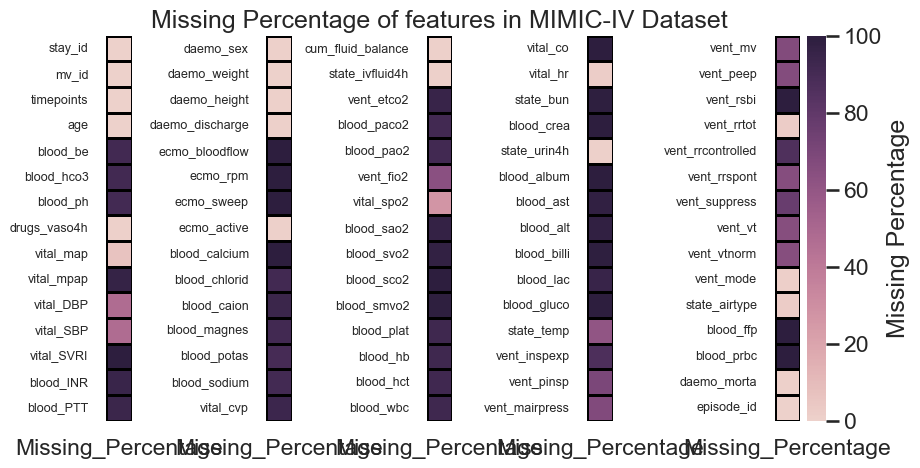

In [18]:
fig, ax = plt.subplots(1, 5, figsize=(10, 5))
heatmap_1 = sns.heatmap(mimic_miss[:15], cmap=cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[:15].index, square=True, ax=ax[0], cbar=False, vmin=0, vmax=100)
heatmap_2 = sns.heatmap(mimic_miss[15:30], cmap=cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[15:30].index, square=True, ax=ax[1], cbar=False, vmin=0, vmax=100)
heatmap_3 = sns.heatmap(mimic_miss[30:45], cmap=cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[30:45].index, square=True, ax=ax[2], cbar=False, vmin=0, vmax=100)
heatmap_4 = sns.heatmap(mimic_miss[45:60], cmap=cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[45:60].index, square=True, ax=ax[3], cbar=False, vmin=0, vmax=100)
heatmap_5 = sns.heatmap(mimic_miss[60:75], cmap=cmap, linewidths=1, linecolor='black', yticklabels=mimic_miss[60:75].index, square=True, ax=ax[4], vmin=0, vmax=100, cbar_kws={'label': 'Missing Percentage'})

#heatmap_1.set_xlabel(None)
heatmap_1.set_ylabel(None)
#heatmap_2.set_xlabel(None)
heatmap_2.set_ylabel(None)
#heatmap_3.set_xlabel(None)
heatmap_3.set_ylabel(None)
#heatmap_4.set_xlabel(None)
heatmap_4.set_ylabel(None)
#heatmap_5.set_xlabel(None)
heatmap_5.set_ylabel(None)

for a in ax:
    a.tick_params(axis='y', labelsize=9)

ax[2].set_title("Missing Percentage of features in MIMIC-IV Dataset")
plt.show()

In [11]:
tud_miss = pd.read_csv("stats/tud_missing_stats.csv")
tud_miss['Missing_Percentage'] = round(tud_miss['Missing_Percentage'], 2)
tud_miss = tud_miss.drop(columns=['Missing_Count']).set_index('Column')
tud_miss

,Missing_Percentage
Column,
caseid,0.00
min duration,0.00
max duration,0.00
BM,84.92
FiO2,84.66
...,...
RR_spont,99.44
Hb,99.99
SVer,99.98


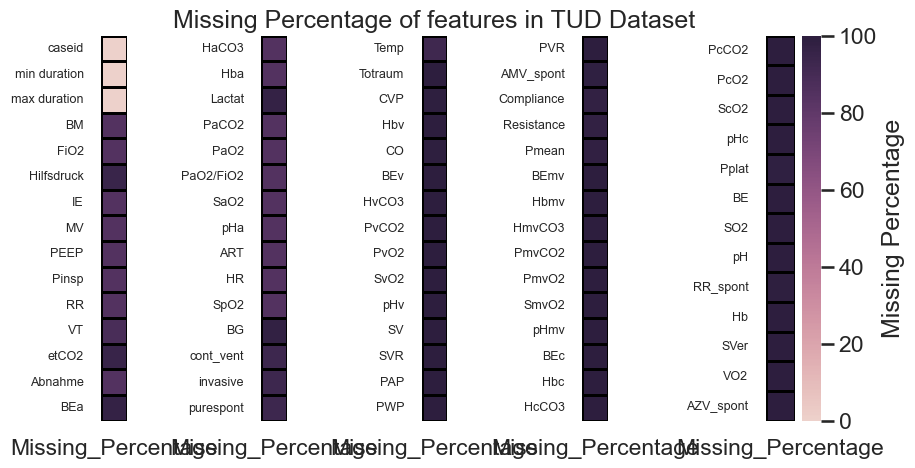

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(10, 5))
heatmap_1 = sns.heatmap(tud_miss[:15], cmap=cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[:15].index, square=True, ax=ax[0], cbar=False, vmin=0, vmax=100)
heatmap_2 = sns.heatmap(tud_miss[15:30], cmap=cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[15:30].index, square=True, ax=ax[1], cbar=False, vmin=0, vmax=100)
heatmap_3 = sns.heatmap(tud_miss[30:45], cmap=cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[30:45].index, square=True, ax=ax[2], cbar=False, vmin=0, vmax=100)
heatmap_4 = sns.heatmap(tud_miss[45:60], cmap=cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[45:60].index, square=True, ax=ax[3], cbar=False, vmin=0, vmax=100)
heatmap_5 = sns.heatmap(tud_miss[60:75], cmap=cmap, linewidths=1, linecolor='black', yticklabels=tud_miss[60:75].index, square=True, ax=ax[4], vmin=0, vmax=100, cbar_kws={'label': 'Missing Percentage'})

#heatmap_1.set_xlabel(None)
heatmap_1.set_ylabel(None)
#heatmap_2.set_xlabel(None)
heatmap_2.set_ylabel(None)
#heatmap_3.set_xlabel(None)
heatmap_3.set_ylabel(None)
#heatmap_4.set_xlabel(None)
heatmap_4.set_ylabel(None)
#heatmap_5.set_xlabel(None)
heatmap_5.set_ylabel(None)

for a in ax:
    a.tick_params(axis='y', labelsize=9)

ax[2].set_title("Missing Percentage of features in TUD Dataset")
plt.show()